<h1><center>HW 3: Build Twitter Networks</center></h1>

### Q1. Scrape the follower-followee network by companies.
    * Define a function to retrieve the follower-followee network of a list of twenty accounts of U.S. FT companies. 
    * The input will be a list of Twitter screen names. 
    * The output will be a dataframe with this list of accounts as row index and column index, and 1 and 0 as values.
    * Note: this will take some time because Twitter API will force you to sleep. 


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tweepy
import datetime
import time


In [5]:
CONSUMER_KEY= "gej6lImlEG6d6oBQSPoYrZtLX"
CONSUMER_SECRET= "10CeuIVFjnK1nmV5ZtX8XPsmoj9hB3R1qzifEdNF0uIUt9H5iE"
ACCESS_KEY= "218127594-ieQeblteXlkyuuLDYg7qX0mT7zQNePohAHFvLs0G"
ACCESS_SECRET= "Qpn6OiiSTRm94cxe2QSi31FUxItJ41iB8iYji1lRYjlSF"
# authorization of consumer key and consumer secret
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
  
# set access to user's access key and access secret 
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
  
# calling the api 
api = tweepy.API(auth, wait_on_rate_limit=True)

# the screen_name of the targeted user
screen_name = "geeksforgeeks"

# printing the latest 20 followers of the user

# followers = []
# print(f"Followers (accounts who follow {screen_name})")
# for page in tweepy.Cursor(api.get_followers, screen_name=screen_name, count=200).pages(10):
#     for user in page:
#         name = user.name
#         followers.append(name)
# print(followers)

# for user in tweepy.Cursor(api.get_friends, screen_name="walmart").items():
#     print('friend: ' + user.screen_name)

def get_follow(accounts):
    tb = pd.DataFrame(columns = accounts, index = accounts)
    for screen_namee in accounts:
        followers = []
        for user in tweepy.Cursor(api.get_friends, screen_name=screen_namee).items():
            followers.append(user.screen_name)
        print(followers)
        for test in accounts:
            if test in followers:
                tb[screen_name][test] = True
            else:
                tb[screen_name][test] = False
        print(tb)
    
    
    
    
    return tb

In [ ]:
# test the function with the list of accounts

accounts=['walmart',
 'tysonfoods',
 'costco',
 'kroger',
 'nestle',
 'pepsico',
 'kelloggcompany',
 'google',
 'ebay',
 'intuit',
 'intel',
 'paypal',
 'oracle']

tb = get_follow(accounts)
print(tb)

Rate limit reached. Sleeping for: 735


### Q2. Build a directed network with the data you just scraped.
    * Bulid a network and visualize it. Hint: you can use "nx.convert_matrix.from_pandas_adjacency".
    * Calculate the **degree centrality**. 
    * Sort these nodes by degree centrality and print the top two account.

,walmart,tysonfoods,costco,kroger,nestle,pepsico,kelloggcompany,google,ebay,intuit,intel,paypal,oracle
walmart,0,1,0,0,0,0,0,0,0,0,0,0,0
tysonfoods,1,0,0,1,0,0,1,0,0,0,0,0,0
costco,0,0,0,0,0,0,0,0,0,0,0,0,0
kroger,0,1,0,0,0,0,0,0,0,0,0,0,0
nestle,0,1,0,1,0,0,1,0,0,0,0,0,0
pepsico,1,1,0,0,0,0,0,0,0,0,0,0,0
kelloggcompany,0,1,0,0,0,0,0,0,0,0,0,0,0
google,0,1,0,0,1,1,0,0,1,1,1,0,0
ebay,0,0,0,0,0,0,0,0,0,0,0,1,0
intuit,0,0,0,0,0,0,0,0,0,0,0,0,0


<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'The follower-followee network of Fortune companies')

(-0.7942480286633221,
 0.595143536694764,
 -1.1891645628352354,
 1.2080201620793662)

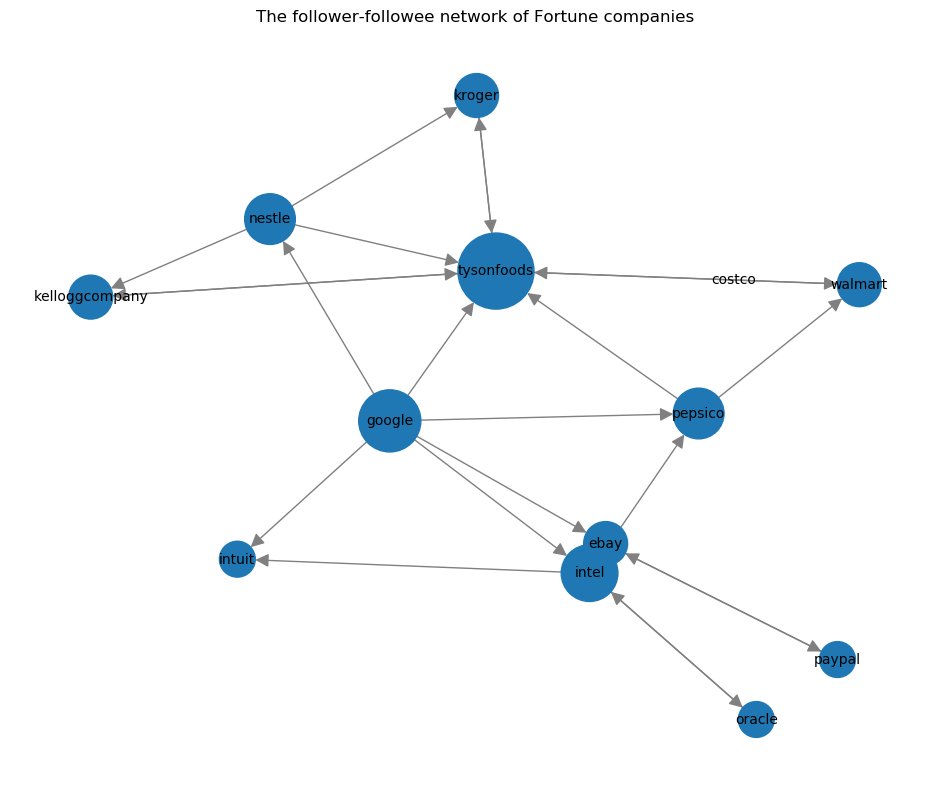

In [15]:
# Build a network from the adjacency matrix
tb=pd.read_csv("tb.csv",header=0,index_col=0)



# Visualize
G = nx.DiGraph()


# node size proportional to degree



# choose a layout function


# edge color


# make arrows more obvious




plt.title('The follower-followee network of Fortune companies')
plt.axis("off") 
plt.show()

In [17]:
import math
# calculate centrality 


# sort




{'walmart': 0.25, 'tysonfoods': 0.75, 'costco': 0.0, 'kroger': 0.25, 'nestle': 0.3333333333333333, 'pepsico': 0.3333333333333333, 'kelloggcompany': 0.25, 'google': 0.5, 'ebay': 0.25, 'intuit': 0.16666666666666666, 'intel': 0.41666666666666663, 'paypal': 0.16666666666666666, 'oracle': 0.16666666666666666}
{'tysonfoods': 0.75, 'google': 0.5, 'intel': 0.41666666666666663, 'nestle': 0.3333333333333333, 'pepsico': 0.3333333333333333, 'walmart': 0.25, 'kroger': 0.25, 'kelloggcompany': 0.25, 'ebay': 0.25, 'intuit': 0.16666666666666666, 'paypal': 0.16666666666666666, 'oracle': 0.16666666666666666, 'costco': 0.0}


['tysonfoods', 'google']

## Q3 scrape tweets
 * Define a functionn to scrape the most recent (e.g. make a 200 call) **original** (exclude retweets) tweets from multiple accouts.
 * For each tweet, grab "id","created_at","full_text","user.screen_name".
 * Make a dataframe and return the dataframe.
 * Use the function to get the original tweets of the top twp accounts from Q2. 


In [26]:
auth=tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY,ACCESS_SECRET)
api=tweepy.API(auth,auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)



def get_all_tweets(user_names):
    
    
    
    


,0,1,2,3
0,1582013011258023936,2022-10-17 14:17:48,b'@TAB1105 Hi Tyshawn -- Thank you for bringin...,TysonFoods
1,1580977784926924800,2022-10-14 17:44:11,b'@foodbankSJ @Walmart We love supporting our ...,TysonFoods
2,1580310266864357377,2022-10-12 21:31:43,b'Congratulations to our own Amy Tu for being ...,TysonFoods
3,1580199161885913091,2022-10-12 14:10:13,b'@azgatekeep Hi David -- Thank you for your n...,TysonFoods
4,1579857661352644608,2022-10-11 15:33:13,b'Our disaster relief team is set up and ready...,TysonFoods
...,...,...,...,...
367,1580518233937178626,2022-10-13 11:18:06,"b""@nikithpatil Hi Nikith. We'd like to move th...",Google
368,1580517973088907270,2022-10-13 11:17:04,"b""@RmiSshBok Hmm. We'd like to move this conve...",Google
369,1580517696906891264,2022-10-13 11:15:58,"b""@NPSusa Hi Neil. If he sends us a tweet, we'...",Google
370,1580517366039203841,2022-10-13 11:14:39,b'@karthik_varma Hi Karthik. You can skip that...,Google


In [8]:
tb = pd.DataFrame(columns = accounts, index = accounts)
tb["walmart"]["costco"] = False
print("test")
tb

test


,walmart,tysonfoods,costco,kroger,nestle,pepsico,kelloggcompany,google,ebay,intuit,intel,paypal,oracle
walmart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tysonfoods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
costco,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kroger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nestle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pepsico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kelloggcompany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ebay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intuit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(tb)